# **CS224W - Colab 2**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scpd-proed/XCS224W-Colab2/blob/main/Notebook/XCS224W_Colab2.ipynb)

Before opening the colab with the badge, you would need to allow Google Colab to access the GitHub private repositories. Please check therefore [this tutorial](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#:~:text=Navigate%20to%20http%3A%2F%2Fcolab,to%20read%20the%20private%20files.).

If colab is opened with this badge, make sure please **save copy to drive** in 'File' menu before running the notebook.

In Colab 2, you will construct your first graph neural network using PyTorch Geometric (PyG) and apply the model on two Open Graph Benchmark (OGB) datasets. These two datasets will be used to benchmark your model's performance on two different graph-based tasks: 1) node property prediction (predicting the properties of single nodes) and 2) graph property prediction (predicting properties of entire graphs or subgraphs).

First, you will learn how PyTorch Geometric stores graphs as PyTorch tensors.

Then, you will load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides data loaders for each dataset but also model evaluators.

Lastly, you will build our own graph neural network using PyTorch Geometric. You will train and evaluate you model on the OGB node property prediction and graph property prediction tasks.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell

Have fun and good luck on Colab 2 :)

## Building + Debugging Notes
While working through this Colab and future Colabs, we strongly encourage you to follow a couple of building / debugging strategies:
- During debugging make sure to run your notebook using the CPU runtime. You can change the notebook runtime by selecting `Runtime` and then `Change runtime type`. From the dropdown, select `None` as the `hardware accelerator`.
- When working with PyTorch and Neural Network models, understanding the shapes of different tensors, especially the input and output tensors is incredibly helpful.
- When training models, it is helpful to start by only running 1 epoch or even just a couple of batch iterations. This way you can check that all your tensor shapes and logic match up, while also tracking expected behavior, such as a decreasing training loss. Remember to comment out / save the default number of epochs that we provide you.


# Device
For the final testing of your models you will want to use a GPU for this Colab to run quickly.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

# Setup
As discussed in Colab 0 and 1, the installation of PyG on Colab can be a little bit tricky. First let us check which version of PyTorch you are running

In [ ]:
import os

In [ ]:
# Install PyTorch
if 'IS_GRADESCOPE_ENV' not in os.environ:
    !pip install torch==2.5.1+cu124 -f https://download.pytorch.org/whl/torch

In [ ]:
import torch
print("PyTorch has version {}".format(torch.__version__))

Download the necessary packages for PyG. Make sure that your version of torch matches the output from the cell above. In case of any issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [ ]:
# Install torch geometric
if 'IS_GRADESCOPE_ENV' not in os.environ:
  !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
  !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.5.1+cu124.html
  !pip install torch-geometric
  !pip install ogb

In [ ]:
import torch_geometric
torch_geometric.__version__

# 1) PyTorch Geometric (Datasets and Data)


PyTorch Geometric has two classes for storing and/or transforming graphs into tensor format. One is `torch_geometric.datasets`, which contains a variety of common graph datasets. Another is `torch_geometric.data`, the class which provides the data handling of graphs as PyTorch tensors.

In this section, you will learn how to use `torch_geometric.datasets` and `torch_geometric.data` together.

## PyG Datasets

The `torch_geometric.datasets` class has many common graph datasets. Here you will explore its usage through one example dataset.

In [ ]:
from torch_geometric.datasets import TUDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  root = './enzymes'
  name = 'ENZYMES'

  # The ENZYMES dataset
  pyg_dataset= TUDataset(root, name)

  # You will find that there are 600 graphs in this dataset
  print(pyg_dataset)

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
    import matplotlib.pyplot as plt
    import networkx as nx
    from torch_geometric.utils import to_networkx

    print(f"Number of graphs: {len(pyg_dataset)}")
    print(f"Number of classes: {pyg_dataset.num_classes}")
    print(f"Number of features: {pyg_dataset.num_features}")
    data = pyg_dataset[0] 
    print(data)  # Show the first graph's 3 components, edge_index, x, and y
    print(data.edge_index[:,0:10])  # Show graph's edges (just first 10)
    print(data.x[:10])  # Show the graph's features per node
    print(data.y)  # Show the graph's classification
    G = to_networkx(data, to_undirected=True)
    node_colors = data.x[:, 0].numpy()  # Use the 0th feature as node color
    
    # Position nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Create figure and draw nodes separately to capture color map
    plt.figure(figsize=(8, 6))
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        node_size=80
    )
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    plt.title(f"ENZYMES Graph 0 — Node Feature 0 (Label: {data.y.item()})")
    
    # This now works correctly
    plt.colorbar(nodes, label='Feature 0 Value')
    plt.axis('off')
    plt.show()

## Question 1: How many classes and features are in the ENZYMES dataset? (2 points)

In [ ]:
def get_num_classes(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_classes = pyg_dataset.num_classes
  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement a function that takes a PyG dataset object
  # and returns the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.
  num_features = pyg_dataset.num_features
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_classes = get_num_classes(pyg_dataset)
  num_features = get_num_features(pyg_dataset)
  print("{} dataset has {} classes".format(name, num_classes))
  print("{} dataset has {} features".format(name, num_features))

## PyG Data

Each PyG dataset stores a list of `torch_geometric.data.Data` objects, where each `torch_geometric.data.Data` object represents a graph. You can easily get the `Data` object by indexing into the dataset.

For more information such as what is stored in the `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 2: What is the label of the graph with index 100 in the ENZYMES dataset? (1 points)

In [ ]:
#pyg_dataset[100].y.data[0].item()


In [ ]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement a function that takes as input a PyG dataset 
  # object and the index of a graph within the dataset,
  # and returns the class/label of the graph (as an integer).

  label = -1

  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y.data[0].item()
  #########################################

  return label

# Here pyg_dataset is a dataset for graph classification
if 'IS_GRADESCOPE_ENV' not in os.environ:
  graph_0 = pyg_dataset[0]
  print(graph_0)
  idx = 100
  label = get_graph_class(pyg_dataset, idx)
  print('Graph with index {} has label {}'.format(idx, label))

## Question 3: How many edges does the graph with index 200 have? (1 points)

In [ ]:
#pyg_dataset[200].num_edges

In [ ]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement a function that takes as inpute a PyG dataset object
  # and the index of a graph in the dataset, and returns the number of 
  # edges in the graph (as an integer). You should not count an edge 
  # twice if the graph is undirected. For example, in an undirected 
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You shouldn't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## 3. Look at the PyG dataset built in functions
  ## (~4 lines of code)
  #num_edges = pyg_dataset[idx].edge_index.shape[1]
  edges = pyg_dataset[idx].edge_index
  edge_set = set()
  for edge in edges.T:
      edge_set.add((min(edge[0].item(),edge[1].item()),max(edge[0].item(),edge[1].item())))
  num_edges = len(list(edge_set))
  #########################################

  return num_edges

if 'IS_GRADESCOPE_ENV' not in os.environ:
  idx = 200
  num_edges = get_graph_num_edges(pyg_dataset, idx)
  print('Graph with index {} has {} edges'.format(idx, num_edges))

# 2) Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. A model's performance over these datasets can then be evaluated using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports PyG dataset and data classes. Here you will explore the `ogbn-arxiv` dataset.

In [ ]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  # Load the dataset with no transformation of the adjacency matrix
  dataset = PygNodePropPredDataset(name=dataset_name, transform=None)
  print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

  # Extract the graph
  data = dataset[0]
  print(data)

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
    from torch_geometric.utils import to_networkx, k_hop_subgraph
    
    print(f"Number of graphs: {len(dataset)}")
    print(f"Number of classes: {dataset.num_classes}")
    print(f"Number of features: {dataset.num_features}")
    #data = pyg_dataset[0] 
    print(data)  # Show the first graph's 3 components, edge_index, x, and y
    print(data.edge_index[:,0:10])  # Show graph's edges (just first 10)
    print(data.x[:10])  # Show the graph's features per node
    print(data.y)  # Show the graph's classification
    
    center_node = 0  # or use torch.randint(0, data.num_nodes, (1,)).item()
    num_hops=1
    # Extract 2-hop subgraph around center node
    subset, edge_index, mapping, edge_mask = k_hop_subgraph(
        node_idx=center_node,
        num_hops=num_hops,
        edge_index=data.edge_index,
        relabel_nodes=True
    )
    
    # Convert to a PyG Data object for plotting
    from torch_geometric.data import Data
    sub_data = Data(
        x=data.x[subset],
        edge_index=edge_index,
        y=data.y[subset]
    )
    
    # Convert to NetworkX
    G = to_networkx(sub_data, to_undirected=True)
    
    # Use a node feature as color (e.g., first feature)
    node_colors = sub_data.x[:, 0].numpy()
    
    # Layout and plot
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 8))
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=50)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.colorbar(nodes, label='Feature 0 Value')
    plt.title(f"{num_hops}-hop Subgraph around Node {center_node} ({len(subset)} nodes)")
    plt.axis('off')
    plt.show()

## Question 4: How many features are in the ogbn-arxiv graph? (1 points)

In [ ]:
def graph_num_features(data):
  # TODO: Implement a function that takes a PyG data object,
  # and returns the number of features in the graph (as an integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  num_features = data.x.shape[1]
  #########################################

  return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_features = graph_num_features(data)
  print('The graph has {} features'.format(num_features))

# 3) GNN: Node Property Prediction

In this section you will build your first graph neural network using PyTorch Geometric. Then you will apply it to the task of node property prediction (node classification).

Specifically, you will use GCN as the foundation for your graph neural network ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). To do so, you will work with PyG's built-in `GCNConv` layer. 

## Setup

In [ ]:
import torch
import pandas as pd
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

## Load and Preprocess the Dataset

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'

  # Load the dataset and transform the adjacency matrix to a sparse tensor.
  # Previously we loaded the same dataset without transforming the adjacency matrix.
  # Beside the obvious difference, the adjacency matrix will be stored under different keys:
  #   - `adj_t` will be the adjacency matrix stored as a sparse Tensor
  #   - `edge_index` be the adjacency matrix stored as a regular Tensor
  # The PyG convolution layers support both types of adjacency matrix representations!
  # For the node prediction task we will be using a sparse adjacency matrix
  dataset = PygNodePropPredDataset(name=dataset_name, transform=T.ToSparseTensor())
  data = dataset[0]

  # Make the adjacency matrix to symmetric
  data.adj_t = data.adj_t.to_symmetric()

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  # If you use GPU, the device should be cuda
  print('Device: {}'.format(device))

  data = data.to(device)
  split_idx = dataset.get_idx_split()
  train_idx = split_idx['train'].to(device)

## GCN Model

Now that you have loaded the datasets, you will implement your own GCN model!

Please follow the figure below to help in implementing the `forward` function.

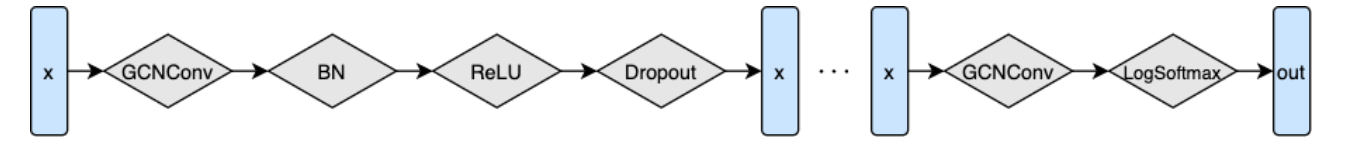

![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [ ]:
#m = torch.nn.LogSoftmax(dim=1)
#mm = torch.nn.LogSoftmax(dim=2)
#mmm = torch.nn.LogSoftmax(dim=3)
#input = torch.randn(1,2,3)
#output = m(input)
#outputt = mm(input)
#outputtt = mmm(input)
#print(input)
#print(output)
#print(outputt)
#print(outputtt)
#print(data.adj_t)

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement the init function that initializes self.convs, 
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. Use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. Use torch.nn.LogSoftmax for self.softmax
        ## 5. The GCNConv layer takes as input 'in_channels' and 
        ## 'out_channels'. For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter BatchNorm1d requires is 'num_features'
        ## For more information please refer to the documentation: 
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        if num_layers > 1:
            self.convs = torch.nn.ModuleList(
                [GCNConv(input_dim, hidden_dim)] + 
                [GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)] + 
                [GCNConv(hidden_dim, output_dim)])
        else:
            self.convs = torch.nn.ModuleList([torch_geometric.nn.GCNConv(input_dim, output_dim)])
        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)])
        self.softmax = torch.nn.LogSoftmax(dim=1)
        #########################################

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement a function that takes as input a feature tensor x 
        # and graph connectivity tensor adj_t, and returns the corresponding output 
        # tensor as shown in the figure above.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as shown in the figure
        ## 2. Pass to the conv layer the feature tensor x and the adjacency matrix, adj_t
        ## 3. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 4. Don't forget to set F.dropout training to self.training
        ## 5. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        h = x
        for i in range(len(self.convs)-1):
          h = self.convs[i](h, adj_t)
          h = self.bns[i](h)
          h = torch.nn.ReLU()(h)
          h = torch.nn.Dropout(p=self.dropout)(h)

        h = self.convs[len(self.convs)-1](h, adj_t)
        if self.return_embeds:
            out = h
        else:
            out = self.softmax(h)
        # h = GNN embedding space.
        #########################################

        return out

In [ ]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement a function that trains the model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slice the model outputs and labels by train_idx
    ## 4. Feed the sliced outputs and labels to the loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.adj_t)  # Perform a single forward pass.
    loss = loss_fn(out[train_idx], data.y[train_idx].long().squeeze())  # Compute the loss solely based on the training nodes.
    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [ ]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator, save_model_results=False):
    # TODO: Implement a function that tests the model by 
    # using the given split_idx and ogb evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out = model(data.x, data.adj_t)
    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [ ]:
# Please do not change the args
if 'IS_GRADESCOPE_ENV' not in os.environ:
  args = {
      'device': device,
      'num_layers': 3,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs': 100,
  }
  args

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
  # Disable compile as this does not seem to work yet in PyTorch 2.0.1/PyG 2.3.1
  # try:
  #   model = torch_geometric.compile(model)
  #   print("GCN Model compiled")
  # except Exception as err:
  #   print(f"Model compile not supported: {err}")

  evaluator = Evaluator(name='ogbn-arxiv')

In [ ]:
import copy
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, data, train_idx, optimizer, loss_fn)
    result = test(model, data, split_idx, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

## Question 5: What are your `best_model` validation and test accuracies?(20 points)

Run the cell below to see the results of your best model and save your model's predictions to a file named *ogbn-arxiv_node.csv*. 

You can view this file by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download this file and attatch it to your submission.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_result = test(best_model, data, split_idx, evaluator, save_model_results=True)
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

# 4) GNN: Graph Property Prediction

In this section you will create a graph neural network for graph property prediction (graph classification).


## Load and preprocess the dataset

In [ ]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.loader import DataLoader
from tqdm import tqdm

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Load the dataset without transforming the adjacency matrix.
  # Without any transformation of the adjacency matrix, as specified in the beginning of this colab,
  # the adjacency matrix will be stored under the `edge_index` key as a regular Tensor
  dataset = PygGraphPropPredDataset(name='ogbg-molhiv', transform=None)

  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  print('Device: {}'.format(device))

  split_idx = dataset.get_idx_split()

  # Check task type
  print('Task type: {}'.format(dataset.task_type))

In [ ]:
#print(split_idx)

In [ ]:
# Load the dataset splits into corresponding dataloaders
# We will train the graph classification task on a batch of 32 graphs
# Shuffle the order of graphs for training set
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
  valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
  test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

## Initialize Model Training Parameters
During debugging and testing we recommend setting `epochs` to a lower value such as 1 or 2.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Please do not change the args
  args = {
      'device': device,
      'num_layers': 5,
      'hidden_dim': 256,
      'dropout': 0.5,
      'lr': 0.001,
      'epochs': 15,
  }
  args

## Graph Prediction Model

### Graph Mini-Batching
Before diving into the actual model, we introduce the concept of mini-batching with graphs. In order to parallelize the processing of a mini-batch of graphs, PyG combines the graphs into a single disconnected graph data object (*torch_geometric.data.Batch*). *torch_geometric.data.Batch* inherits from *torch_geometric.data.Data* (introduced earlier) and contains an additional attribute called `batch`. 

The `batch` attribute is a vector mapping each node to the index of its corresponding graph within the mini-batch:

    batch = [0, ..., 0, 1, ..., n - 2, n - 1, ..., n - 1]

This attribute is crucial for associating which graph each node belongs to and can be used to e.g. average the node embeddings for each graph individually to compute graph level embeddings. 



### Implementation
Now, you have all of the tools to implement a GCN Graph Prediction model!  

To do so, you will reuse the your existing GCN model to generate `node_embeddings` for a graph and then use `Global Pooling` over these node embeddings to create a graph level embeddings that can be used to predict graph properties. Remeber that the `batch` attribute will be essential for performining Global Pooling over our mini-batch of graphs.

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = None

        ############# Your code here ############
        ## Note:
        ## 1. Initialize self.pool as a reference to a global mean pooling layer
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        self.pool = global_mean_pool
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement a function that takes as input a 
        # mini-batch of graphs (torch_geometric.data.Batch) and 
        # returns the predicted graph property for each graph. 
        #
        # NOTE: Since we are predicting graph level properties,
        # your output will be a tensor with dimension equaling
        # the number of graphs in the mini-batch

    
        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using your existing GCN model and 
        ## pass it the feature tensor, embed, and the adjacency matrix, edge_index
        ## 2. Use the global pooling layer to aggregate features for each individual graph
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict each graph's property
        ## (~3 lines of code)
        x = self.gnn_node(embed, edge_index)
        x = self.pool(x, batch)
        out = self.linear(x)
        #########################################

        return out

In [ ]:
def train(model, device, data_loader, optimizer, loss_fn):
    # TODO: Implement a function that trains your model by 
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignore nan targets (unlabeled) when computing training loss.
        is_labeled = batch.y == batch.y

        ############# Your code here ############
        ## Note:
        ## 1. Zero grad the optimizer
        ## 2. Feed the data into the model
        ## 3. Use `is_labeled` mask to filter outputs and labels
        ## 4. You may need to change the type of label to torch.float32
        ## 5. Feed the output and label to the loss_fn
        ## (~3 lines of code)
        optimizer.zero_grad()
        #out = model(batch.x, batch.batch)  # Perform a single forward pass.
        out = model(batch)  # Perform a single forward pass.
        loss = loss_fn(out[is_labeled], batch.y[is_labeled].squeeze().float())  # Compute the loss solely based on the training nodes.
        #########################################

        loss.backward()
        optimizer.step()

    return loss.item()

In [ ]:
# The evaluation function
def eval(model, device, loader, evaluator, save_model_results=False, save_file=None):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    if save_model_results:
        print ("Saving Model Predictions")
        
        # Create a pandas dataframe with a two columns
        # y_pred | y_true
        data = {}
        data['y_pred'] = y_pred.reshape(-1)
        data['y_true'] = y_true.reshape(-1)

        df = pd.DataFrame(data=data)
        # Save to csv
        df.to_csv('ogbg-molhiv_graph_' + save_file + '.csv', sep=',', index=False)

    return evaluator.eval(input_dict)

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  model = GCN_Graph(args['hidden_dim'],
              dataset.num_tasks, args['num_layers'],
              args['dropout']).to(device)
  # Disable compile as this does not seem to work yet in PyTorch 2.0.1/PyG 2.3.1
  # try:
  #   model = torch_geometric.compile(model)
  #   print("Graph Prediction Model compiled")
  # except Exception as err:
  #   print(f"Model compile not supported: {err}")

  evaluator = Evaluator(name='ogbg-molhiv')

In [ ]:
import copy

if 'IS_GRADESCOPE_ENV' not in os.environ:
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = torch.nn.BCEWithLogitsLoss()

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    print('Training...')
    loss = train(model, device, train_loader, optimizer, loss_fn)

    print('Evaluating...')
    train_result = eval(model, device, train_loader, evaluator)
    val_result = eval(model, device, valid_loader, evaluator)
    test_result = eval(model, device, test_loader, evaluator)

    train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

## Question 6: What are your `best_model` validation and test ROC-AUC scores? (20 points)

Run the cell below to see the results of your best model and save your model's predictions over the validation and test datasets. The resulting files are named *ogbg-molhiv_graph_valid.csv* and *ogbg-molhiv_graph_test.csv*. 

Again, you can view these files by clicking on the *Folder* icon on the left side pannel. As in Colab 1, when you sumbit your assignment, you will have to download these files and attatch them to your submission.

In [ ]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
  valid_acc = eval(best_model, device, valid_loader, evaluator, save_model_results=True, save_file="valid")[dataset.eval_metric]
  test_acc  = eval(best_model, device, test_loader, evaluator, save_model_results=True, save_file="test")[dataset.eval_metric]

  print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

## Question 7 (Optional): Experiment with the two other global pooling layers in Pytorch Geometric.

# Submission

You will need to submit four files on Gradescope to complete this notebook. 

1.   Your completed *XCS224W_Colab2.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. 
2.  *ogbn-arxiv_node.csv* 
3.  *ogbg-molhiv_graph_valid.csv*
4.  *ogbg-molhiv_graph_test.csv*

Download the csv files by selecting the *Folder* icon on the left panel. 

To submit your work, zip the files downloaded in steps 1-4 above and submit to gradescope. **NOTE:** DO NOT rename any of the downloaded files. 